### En este notebook se va a analizar la distancia

In [3]:

import networkx as nx
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [7]:
df_distance_min = pd.read_excel("../dataset/df_distance_min.xlsx")
df_distance_min.head(5)

,Cliente_1,Cliente_2,Cliente_3,Cliente_4,Cliente_5,Cliente_6,Cliente_7,Cliente_8,Cliente_9,Cliente_10,...,Cliente_12,Cliente_13,Cliente_14,Cliente_15,Cliente_16,Cliente_17,Cliente_18,Cliente_19,Cliente_20,Almacén
0,0.000000,15.731667,19.651667,2.543333,7.550000,3.760000,15.838333,22.388333,8.563333,7.185000,...,10.028333,12.336667,5.098333,17.525000,2.943333,15.548333,15.105000,23.855000,23.700000,6.905000
1,15.731667,0.000000,7.505000,15.798333,17.241667,17.316667,1.248333,20.700000,21.325000,13.503333,...,14.423333,6.695000,15.891667,20.061667,14.023333,26.153333,14.803333,14.235000,21.908333,20.381667
2,19.651667,7.505000,0.000000,19.285000,0.000000,0.000000,0.000000,22.076667,19.981667,17.378333,...,15.800000,11.541667,17.270000,20.405000,18.500000,27.531667,16.181667,13.023333,18.080000,20.873333
3,2.543333,15.798333,19.285000,0.000000,8.533333,1.878333,16.521667,22.863333,7.165000,7.013333,...,10.501667,10.768333,6.181667,18.000000,2.465000,16.546667,15.580000,24.328333,23.030000,7.400000
4,7.550000,17.241667,0.000000,8.533333,0.000000,9.711667,0.000000,0.000000,0.000000,11.058333,...,8.793333,18.555000,7.391667,16.291667,10.738333,9.998333,13.871667,22.620000,28.093333,7.938333


In [8]:
df_distance_min.isna().sum()

,0
Cliente_1,0
Cliente_2,0
Cliente_3,0
Cliente_4,0
Cliente_5,0
Cliente_6,0
Cliente_7,0
Cliente_8,0
Cliente_9,0
Cliente_10,0


In [9]:
df_distance_min.dtypes

,0
Cliente_1,float64
Cliente_2,float64
Cliente_3,float64
Cliente_4,float64
Cliente_5,float64
Cliente_6,float64
Cliente_7,float64
Cliente_8,float64
Cliente_9,float64
Cliente_10,float64


In [10]:
df_distance_min.describe().T

,count,mean,std,min,25%,50%,75%,max
Cliente_1,21.0,11.483810,7.368238,0.0,5.098333,10.028333,15.838333,23.855000
Cliente_2,21.0,15.100794,6.575722,0.0,14.023333,15.798333,20.061667,26.153333
Cliente_3,21.0,14.506349,8.239668,0.0,11.541667,17.378333,19.651667,27.531667
Cliente_4,21.0,11.542381,7.505616,0.0,6.181667,10.501667,16.546667,24.328333
Cliente_5,21.0,9.690794,7.781569,0.0,5.120000,8.793333,13.871667,28.093333
Cliente_6,21.0,10.801111,7.467207,0.0,6.033333,9.711667,17.068333,23.876667
Cliente_7,21.0,11.923889,9.021039,0.0,0.000000,14.550000,18.298333,26.281667
Cliente_8,21.0,18.555317,7.352808,0.0,16.505000,20.700000,22.668333,30.101667
Cliente_9,21.0,13.257143,8.189932,0.0,7.165000,13.025000,19.981667,25.875000
Cliente_10,21.0,11.199206,6.750769,0.0,7.185000,11.058333,13.976667,26.283333


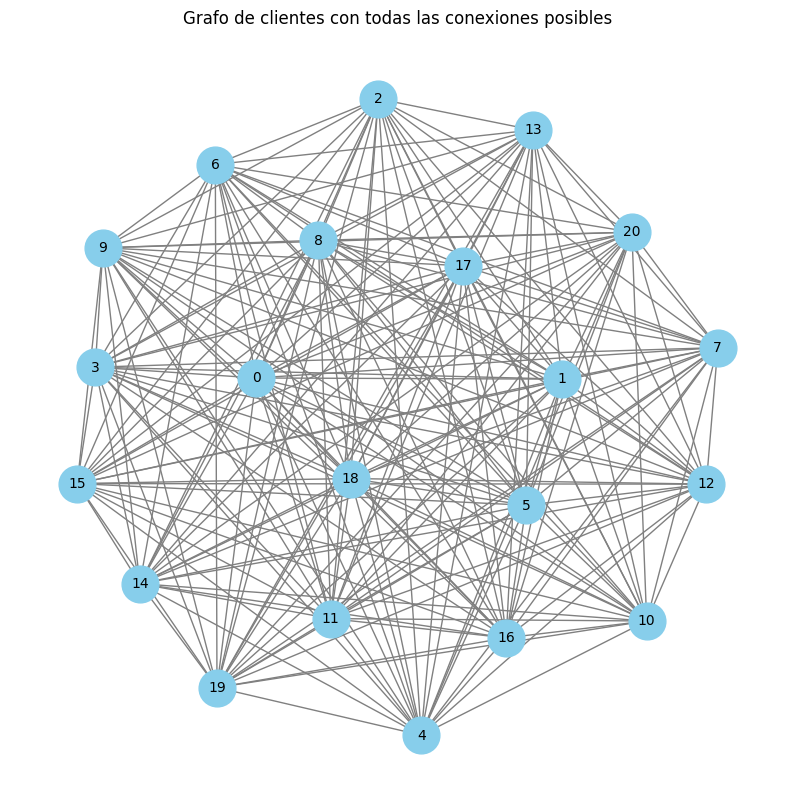

In [11]:
G = nx.Graph()

# Agregar nodos
G.add_nodes_from(df_distance_min.index)

# Agregar todas las conexiones posibles (grafo completo)
for cliente1 in df_distance_min.index:
    for cliente2 in df_distance_min.index:
        if cliente1 != cliente2:  # Evitar loops (autoconexiones)
            G.add_edge(cliente1, cliente2)

# Dibujar el grafo
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Layout para posicionar los nodos
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Ajustar y mostrar el gráfico
plt.title("Grafo de clientes con todas las conexiones posibles")
plt.axis('off')
plt.show()